In [52]:
# import necessary libraries

# loading and reading data
import numpy as np
import pandas as pd

# libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# load the data set(maternal_health data)

df = pd.read_csv('Maternal Health Risk Data Set.csv')


In [54]:
# Check the first 5 columns of the data set
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Data Features explanation
|Feature	|Description	                                                                    |Unit      |
|-----------|-----------------------------------------------------------------------------------|----------|
|Age	    |Ages in years when a woman is pregnant	                                            |          |
|SystolicBP	|Upper value of Blood Pressure                                                      |mmHg      |
|DiastolicBP|Lower value of Blood Pressure	                                                    |mmHg      |
|BS	        |Blood glucose levels is in terms of a molar concentration	                        |mmol/L    |
|BodyTerm	|Bodytemperature	                                                                |Fahrenheit|
|HeartRate	|A normal resting heart rate	                                                    |bpm       |
|RiskLevel	|Predicted Risk Intensity Level during pregnancy considering the previous attribute |          |	


## 1. Data Overview

- Data Stucture
- Data Quality check
- Data Descriptive analysis

### 1.1 Data Structure

| Task           | Objective                                             |
|----------------|-------------------------------------------------------|
| Data Dimension | To know the number of columns and rows of the dataset |
| Data Types     | To verify that the data types align with the features |
| Data Columns   | To list and understand the columns                    |


### 1.1.0 Data Structure code line

In [55]:
# checking the dimensionality of the data set
print(f" Data set Dimensions: {df.shape}")

print('---------------------------------------')
# Checking the data types
print(f" Data types:\n{df.dtypes}")

print('----------------------------------------')
# check the data columns
print(f" Data columns: {df.columns}")


 Data set Dimensions: (1014, 7)
---------------------------------------
 Data types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object
----------------------------------------
 Data columns: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


### 1.2 Data Quality Check

| Task        |Objective                                              |
|-------------|-------------------------------------------------------|
|missing value| identify missing data and understand its extent       |
|Data Range   | verify numerical data is within expected bounds       |

### 1.2.1 Code for Data Quality Check

In [56]:
# check for missing value
print(f"missing value: {df.isnull().sum()}")

print('----------------------------------------')
# check for data range and validity
num_columns = df.select_dtypes(include=['number']).columns
for col in num_columns:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")




missing value: Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
----------------------------------------
Age: min = 10, max = 70
SystolicBP: min = 70, max = 160
DiastolicBP: min = 49, max = 100
BS: min = 6.0, max = 19.0
BodyTemp: min = 98.0, max = 103.0
HeartRate: min = 7, max = 90


### 1.3 Data descriptive analysis

| Task                             | Objective                                                                          |
|----------------------------------|------------------------------------------------------------------------------------|
|statistics of numerical features  | quick overview of the distribution and central tendencies of the numerical features|
|statistics of categorical features| understand class distribution of categorical variable                              |

### 1.3.1 Code for Data Statistics distribution

In [57]:
# check the summary statistics of numerical features
print('The summary Statistics of numerical features:')
df.describe()

The summary Statistics of numerical features:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [58]:
# check the summary statistics of the class distribution of the target variable
print(df.describe(include='object'))
# Value counts for categorical features
print("\nCategorical Data Insights:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} frequency:")
    print(df[col].value_counts())



       RiskLevel
count       1014
unique         3
top     low risk
freq         406

Categorical Data Insights:
RiskLevel frequency:
low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


### 1.3.1 Further analysis on the numerical features

In [59]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in df.select_dtypes(include=['number']).columns:
    skewness_value = round(df[col].skew(),2)
    kurtosis_value = round(df[col].kurt(),2)
    print(f"{col}: Skewness = {skewness_value}, Kurtosis = {kurtosis_value}")


Skewness and Kurtosis:
Age: Skewness = 0.78, Kurtosis = -0.39
SystolicBP: Skewness = -0.25, Kurtosis = -0.61
DiastolicBP: Skewness = -0.05, Kurtosis = -0.95
BS: Skewness = 1.87, Kurtosis = 2.3
BodyTemp: Skewness = 1.75, Kurtosis = 1.45
HeartRate: Skewness = -1.04, Kurtosis = 8.4


 - Explanation of Skewness
 1) Age, BS, BodyTemp: positvely skewed, suggesting the presence of higher values pulling the tail of the distribution to the right
 2) HeartRate: Negatively skewed which indicates some low values extending the tail to the left.
 
 - Explanation of Kurtosis
 1) BS, BodyTemp, HeartRate: High positve kurtosis which indicates some extreme values or presence of outliers
 2) Age, SystolicBP, DiastolicBP: Negative kurtosis which suggests a flatter distribution with minimum outliers

## 2. Enhancement of Data
- Additional columns will be created using existing features:
1) Mean Arterial Pressure(MAP): The MAP helps in monitoring hypertension and ensuring adequate organ perfusion during pregnancy
2) Pulse Pressure(PP): Provides insights into the arterial stiffness and cardiovascular risk.

- new column of a numerical data type for the RiskLevel feature will be created 

### 2.1 Code for Enhancement of Data

In [60]:
# Calculate the Mean Arterial Pressure(MAP)
df['MAP'] = round((df['SystolicBP'] +2 * df['DiastolicBP'])/3,2)

# Calculate Pulse Pressure (PP)
df['Pulse'] = df['SystolicBP'] - df['DiastolicBP']

# Map the Target Variable
Risk = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel_num'] = df['RiskLevel'].map(Risk).astype(float)

# checking the enhanced data set
print('\nEnhanced Data set')
df.head(5)


Enhanced Data set


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,MAP,Pulse,RiskLevel_num
0,25,130,80,15.0,98.0,86,high risk,96.67,50,2.0
1,35,140,90,13.0,98.0,70,high risk,106.67,50,2.0
2,29,90,70,8.0,100.0,80,high risk,76.67,20,2.0
3,30,140,85,7.0,98.0,70,high risk,103.33,55,2.0
4,35,120,60,6.1,98.0,76,low risk,80.00,60,0.0


## 3. Exploratory Data Analysis(EDA)
- **EDA** is a vital step in the data analysis process and it involves summarizing a dataset's main characteristics using visuals.
it's importance includes:
1) understand the data structure
2) detect patterns and anomalies
3) formuate hypothesis for further analysis

### 3.1. Univariate analysis on the target variable distribution
- **Bar plot:** to visualize the count of each class
- **Pie chart:** to visualize the percentage distribution of each class

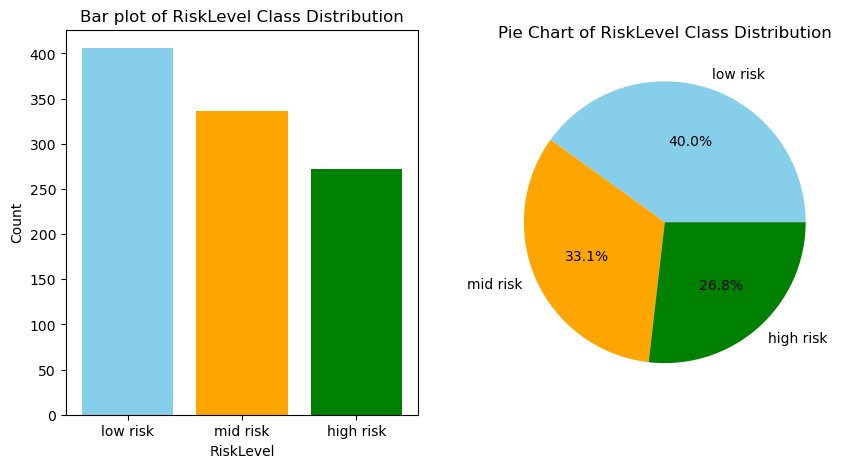

In [61]:
# Calculate the class distribution
class_dis = df['RiskLevel'].value_counts()

# create subplots for bar plot and pie chart
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Bar Chart
ax[0].bar(class_dis.index, class_dis.values, color=['skyblue', 'orange', 'green'])
ax[0].set_title('Bar plot of RiskLevel Class Distribution')
ax[0].set_xlabel('RiskLevel')
ax[0].set_ylabel('Count')


# Pie Chart
ax[1].pie(class_dis.values, labels=class_dis.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
ax[1].set_title('Pie Chart of RiskLevel Class Distribution')

# To display plot
plt.show();

- The above plots suggest our target variable RiskLevel has low risk of 40%, mid risk of 33.1% and high risk of 26.8%.
This clearly indicates a class inbalance among our target variable.

### 3.2. Correlation heat map of the features
- The heatmap is used to visualize the relationship between numerical features in the dataset
- **+1.0:** indicate perfect positive relation. positive values means as one feature increases, the other tends to increase too
- **-1.0:** indicate perfect negative relation. negative values means as one feature increases, the other decrease
- **0.0:** means no relation. suggesting the features has no linear relationship(no dependence)

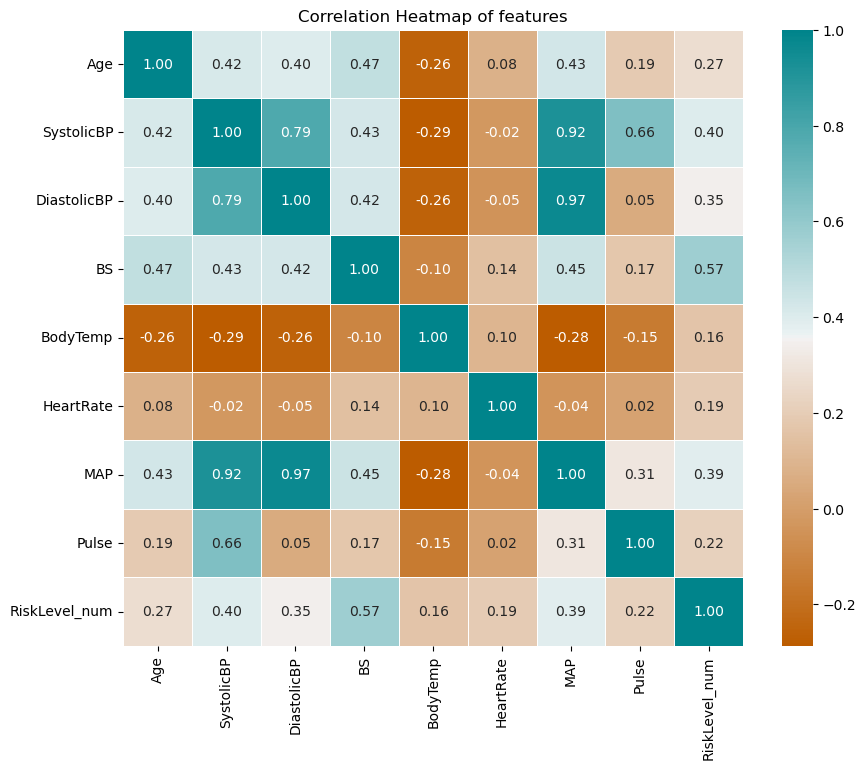

In [62]:
# Calculate the correlation matrix
corr_matrix = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'MAP', 'Pulse', 'RiskLevel_num']].corr()

# set the colors for the heatmap
custom_palette = sns.diverging_palette(30, 200, s=100, l=50, n=400, center="light")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap= custom_palette, cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of features')
plt.show();



## Corelation heatmap key observations

- **features with strong positve correlations:**
    - **SystolicBP and DiastolicBP**  
    - **MAP with systolicBP and DiastolicBP**. This relationship aligns with its calculation method
    
- **features with moderate positive correlations:**
    - **Age with BS (0.47) and MAP (0.43)**
    - **Pulse with SystolicBP (0.66)**
    - **RiskLevel_num with BS (0.57) and MAP(0.39):** suggests these features are important for predictingn risk levels.

- **Low correlation:**
    - **BodyTemp and HeartRate:** shows low correlation with other features, suggesting independence on other features.

### 3.3. Pairwise plot between demographic feature and Blood pressure related features

<Figure size 1000x1000 with 0 Axes>

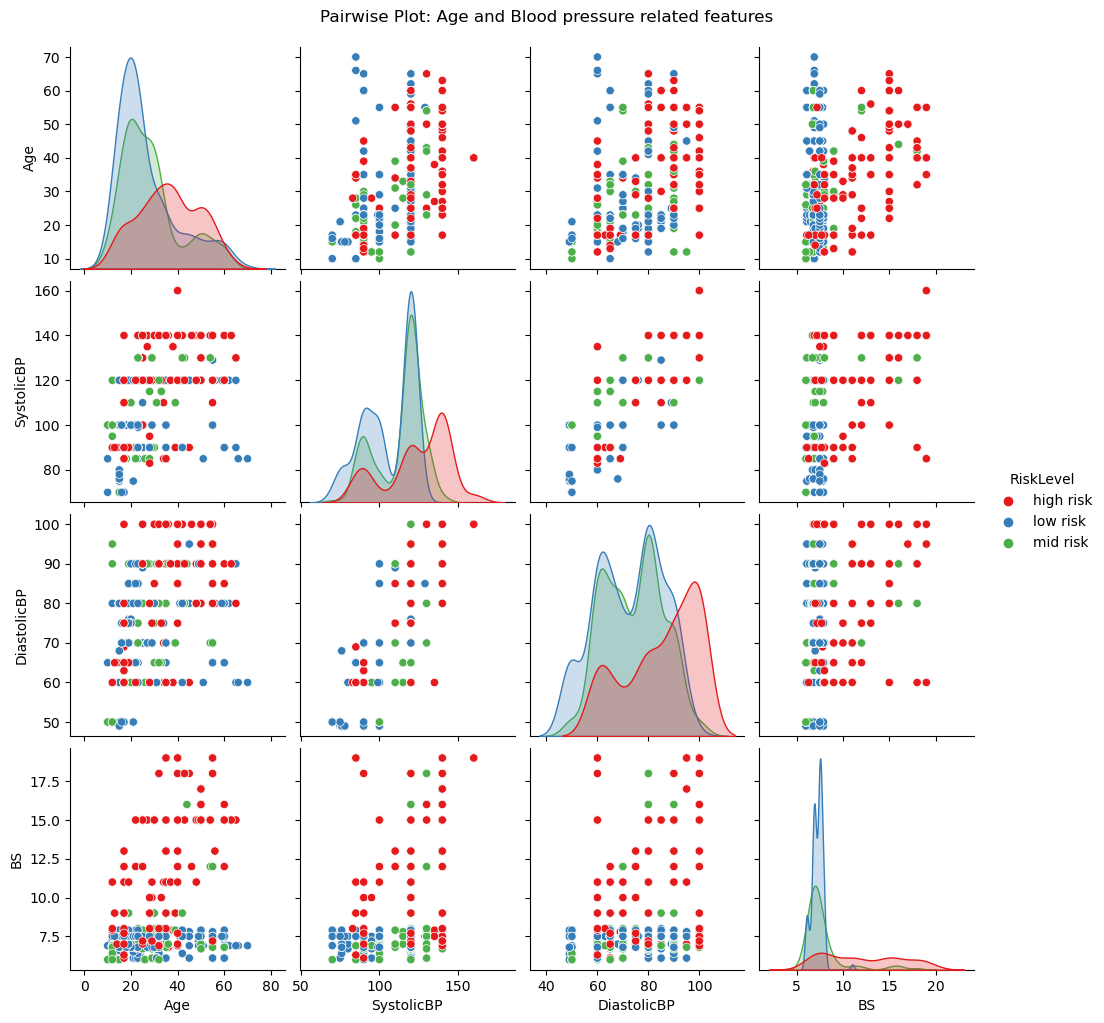

In [63]:
# Define feature sets
features_1 = ['Age', 'SystolicBP', 'DiastolicBP', 'BS']

# Pairwise plot 
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=features_1, hue='RiskLevel', palette='Set1')
plt.suptitle('Pairwise Plot: Age and Blood pressure related features', y=1.02)
plt.show();


### 3.4. Pairplot of some physiological features

<Figure size 1000x1000 with 0 Axes>

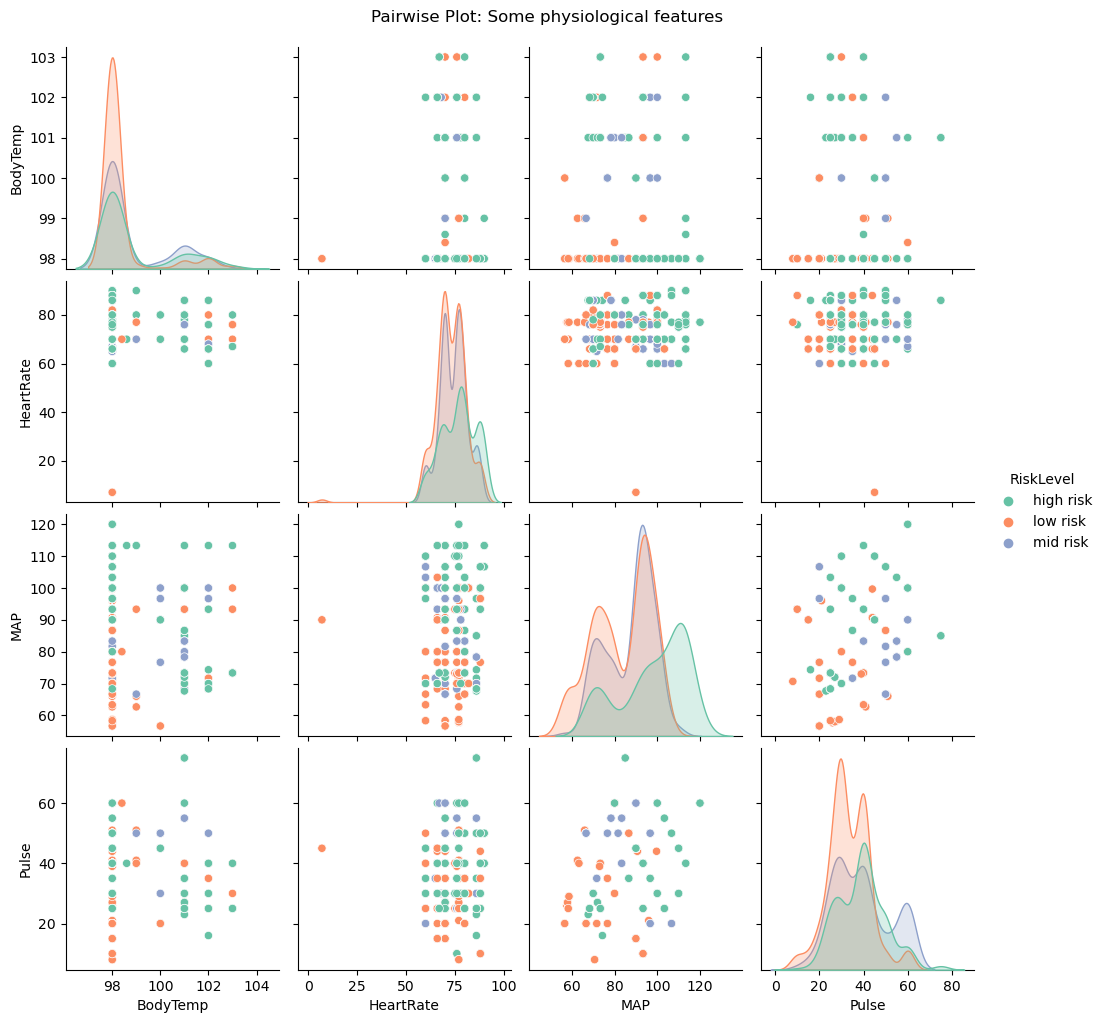

In [64]:
# Define feature sets
feature_2 = ['BodyTemp', 'HeartRate', 'MAP', 'Pulse']

# Pairwise plot for Set 2
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=feature_2, hue='RiskLevel', palette='Set2')
plt.suptitle('Pairwise Plot: Some physiological features', y=1.02)
plt.show();

## 4. Data Preprocessing
- It is essential to preprocess the data so as to ensure that the data is clean, well-formatted, and ready for model training.
This process when carefully done leads to more accurate and reliable results.

- **The following preprocessing will be applied:**
    - **identify and handle anomalies if any**
    - **identify and handle skewed data if any**
    - **Scale and standardize features**
    - **Segment Data**
    - **Split data**
    